# Model Testing

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

## Load Datasets and Combine into One

In [2]:
user_test_ratings = pd.read_csv("D:/MovieRecommender.com/Data/user_test_ratings.csv")
movies = pd.read_csv("D:/MovieRecommender.com/Data/movies_cleaned.csv")
user_test_ratings.head()

,Date,Name,Year,Letterboxd URI,Rating
0,2021-02-01,The Social Network,2010,https://boxd.it/17ue,5.00
1,2021-02-01,Booksmart,2019,https://boxd.it/igNS,4.50
2,2021-02-01,Superbad,2007,https://boxd.it/20hO,5.00
3,2021-02-01,10 Things I Hate About You,1999,https://boxd.it/23AO,4.50
4,2021-02-02,Uncut Gems,2019,https://boxd.it/gXGc,4.50


In [3]:
movies.shape

(26537, 30)

In [4]:
user_test_ratings = user_test_ratings.rename(columns={'Name' : 'name', 'Rating':'userRating', 'Year' : 'date'})
user_test_ratings = user_test_ratings.drop(columns=['Date', 'Letterboxd URI'])
user_test_ratings.head()

,name,date,userRating
0,The Social Network,2010,5.00
1,Booksmart,2019,4.50
2,Superbad,2007,5.00
3,10 Things I Hate About You,1999,4.50
4,Uncut Gems,2019,4.50


In [5]:
user_test_ratings.shape

(152, 3)

In [6]:
movies_with_user = pd.merge(user_test_ratings, movies, how='inner', on=['name', 'date'])
movies_with_user.head()

,name,date,userRating,id,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,english
0,The Social Network,2010,5.00,1000051.00,You don't get to 500 million friends without m...,"On a fall night in 2003, Harvard undergrad and...",121.00,3.95,https://a.ltrbxd.com/resized/sm/upload/nw/cm/p...,True,108.48,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Booksmart,2019,4.50,1000277.00,Getting straight A's. Giving zero F's.,"Two academic teenage superstars realize, on th...",102.00,3.75,https://a.ltrbxd.com/resized/film-poster/4/3/5...,True,50.51,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Superbad,2007,5.00,1000145.00,Come and Get Some!,Two co-dependent high school seniors are force...,113.00,3.88,https://a.ltrbxd.com/resized/film-poster/4/7/7...,True,84.24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,10 Things I Hate About You,1999,4.50,1000054.00,How do I loathe thee? Let me count the ways.,"On the first day at his new school, Cameron in...",97.00,3.99,https://a.ltrbxd.com/resized/sm/upload/hl/jj/b...,True,88.53,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
4,Uncut Gems,2019,4.50,1000112.00,This is how I win.,A charismatic New York City jeweler always on ...,136.00,3.95,https://a.ltrbxd.com/resized/film-poster/4/0/4...,True,67.73,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True


In [7]:
movies_with_user.shape

(143, 31)

In [8]:
print(movies_with_user.duplicated(subset=['name']).sum())

0


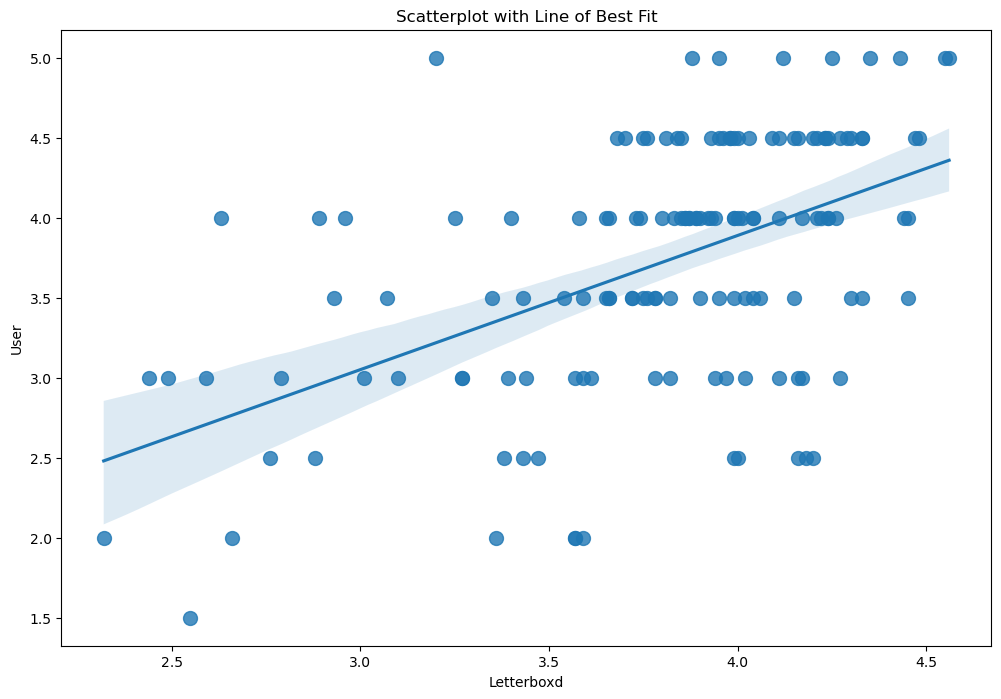

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.regplot(x='rating', y='userRating', data=movies_with_user, scatter_kws={'s': 100})  # s controls marker size
plt.title('Scatterplot with Line of Best Fit')
plt.xlabel('Letterboxd')
plt.ylabel('User')
plt.show()

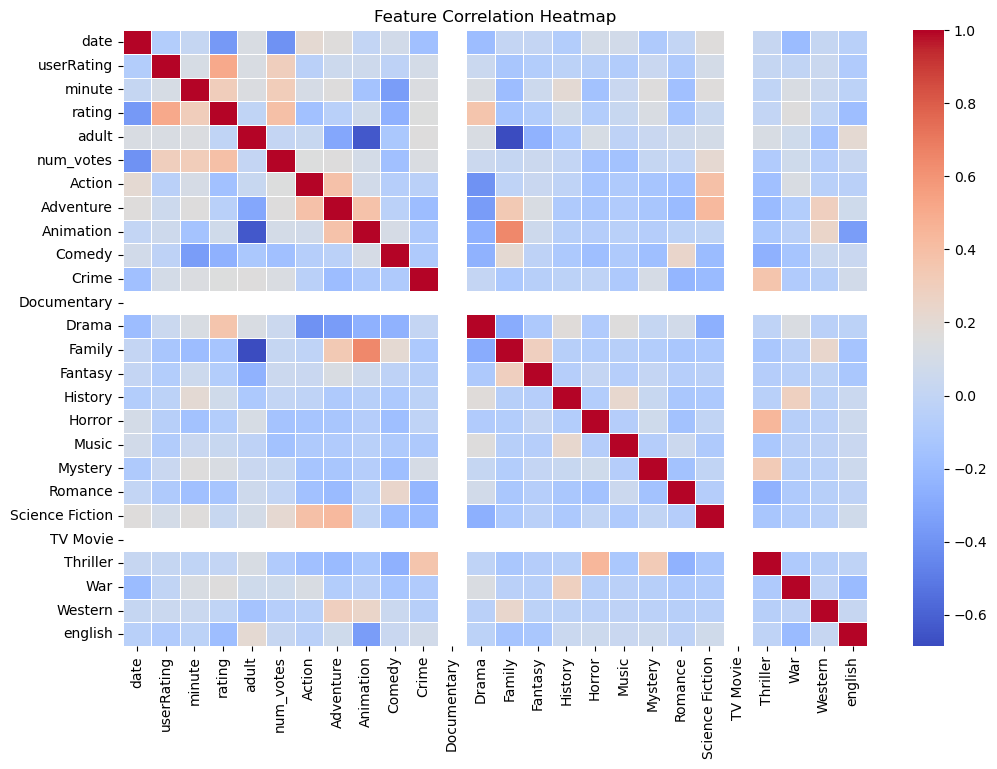

In [10]:
corr_matrix = movies_with_user.drop(columns=['name', 'poster', 'description', 'tagline', 'id']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
print(corr_matrix.loc['userRating', :])

date              -0.07
userRating         1.00
minute             0.12
rating             0.51
adult              0.13
num_votes          0.30
Action            -0.05
Adventure          0.05
Animation          0.06
Comedy            -0.02
Crime              0.09
Documentary         NaN
Drama              0.04
Family            -0.13
Fantasy           -0.08
History           -0.03
Horror            -0.06
Music             -0.08
Mystery            0.04
Romance           -0.09
Science Fiction    0.10
TV Movie            NaN
Thriller           0.01
War               -0.00
Western            0.04
english           -0.09
Name: userRating, dtype: float64


In [12]:
merged_df = pd.merge(movies, user_test_ratings, how='outer', on=['name', 'date'])

movies_no_user = merged_df[merged_df['userRating'].isnull()].drop(columns='userRating')
movies_no_user.head()

,id,name,date,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,english
0,1008245.00,"""Sr.""",2022.00,Like father. Like son. Like no other.,A portrait of the life and career of Robert Do...,90.00,3.68,https://a.ltrbxd.com/resized/film-poster/9/1/3...,True,7.07,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,1053441.00,#1 Cheerleader Camp,2010.00,Grab your spirit sticks!,A pair of horny college guys get summer jobs a...,95.00,2.38,https://a.ltrbxd.com/resized/film-poster/2/3/6...,True,9.54,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,1002506.00,#Alive,2020.00,You must survive.,"As a grisly virus rampages a city, a lone man ...",98.00,3.06,https://a.ltrbxd.com/resized/film-poster/5/4/1...,True,41.58,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,1033427.00,#AnneFrank. Parallel Stories,2019.00,NaN,One single Anne Frank moves us more than the c...,92.00,3.31,https://a.ltrbxd.com/resized/film-poster/5/3/7...,True,6.93,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True
4,1055800.00,#ChadGetsTheAxe,2022.00,NaN,Four social media influencers livestream their...,83.00,3.20,https://a.ltrbxd.com/resized/film-poster/9/4/8...,True,2.24,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


### Drop genre columns that have less than 5 requency

In [13]:
column_sums = movies_with_user.loc[:, 'Action':].sum()
columns_to_drop = column_sums[column_sums < 1].index
movies_with_user = movies_with_user.drop(columns=columns_to_drop)
movies_no_user =  movies_no_user.drop(columns=columns_to_drop)

if (~movies_with_user['english']).sum() < 1:
    movies_with_user = movies_with_user.drop(columns='english')
    movies_no_user = movies_no_user.drop(columns='english')

movies_with_user.head()


,name,date,userRating,id,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,english
0,The Social Network,2010,5.00,1000051.00,You don't get to 500 million friends without m...,"On a fall night in 2003, Harvard undergrad and...",121.00,3.95,https://a.ltrbxd.com/resized/sm/upload/nw/cm/p...,True,108.48,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,Booksmart,2019,4.50,1000277.00,Getting straight A's. Giving zero F's.,"Two academic teenage superstars realize, on th...",102.00,3.75,https://a.ltrbxd.com/resized/film-poster/4/3/5...,True,50.51,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Superbad,2007,5.00,1000145.00,Come and Get Some!,Two co-dependent high school seniors are force...,113.00,3.88,https://a.ltrbxd.com/resized/film-poster/4/7/7...,True,84.24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,10 Things I Hate About You,1999,4.50,1000054.00,How do I loathe thee? Let me count the ways.,"On the first day at his new school, Cameron in...",97.00,3.99,https://a.ltrbxd.com/resized/sm/upload/hl/jj/b...,True,88.53,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True
4,Uncut Gems,2019,4.50,1000112.00,This is how I win.,A charismatic New York City jeweler always on ...,136.00,3.95,https://a.ltrbxd.com/resized/film-poster/4/0/4...,True,67.73,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True


## Model Testing

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# from sklearn.preprocessing import StandardScaler

### Train Test Split

In [15]:
features = movies_with_user.drop(columns=['userRating', 'name', 'description', 'poster', 'tagline', 'id'])
target = movies_with_user['userRating']

num_features = ['rating', 'date', 'minute']
one_hot_features = movies_with_user.loc[:, 'Action':].columns

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

features.head()

,date,minute,rating,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,english
0,2010,121.00,3.95,True,108.48,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,2019,102.00,3.75,True,50.51,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,2007,113.00,3.88,True,84.24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,1999,97.00,3.99,True,88.53,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True
4,2019,136.00,3.95,True,67.73,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True


### Standardize Numerial Features

In [16]:
'''scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_features])
X_test_num_scaled = scaler.transform(X_test[num_features])

# Creating DataFrames from the scaled numerical features
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_features)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_features)

# Concatenating the scaled numerical features and the one-hot encoded features
X_train_scaled = pd.concat([X_train_num_scaled.reset_index(drop=True), X_train[one_hot_features].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_num_scaled.reset_index(drop=True), X_test[one_hot_features].reset_index(drop=True)], axis=1)

X_train_scaled = X_train_scaled.sort_values(by=['rating'], ascending=False)


X_train_scaled.head()'''

"scaler = StandardScaler()\nX_train_num_scaled = scaler.fit_transform(X_train[num_features])\nX_test_num_scaled = scaler.transform(X_test[num_features])\n\n# Creating DataFrames from the scaled numerical features\nX_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_features)\nX_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_features)\n\n# Concatenating the scaled numerical features and the one-hot encoded features\nX_train_scaled = pd.concat([X_train_num_scaled.reset_index(drop=True), X_train[one_hot_features].reset_index(drop=True)], axis=1)\nX_test_scaled = pd.concat([X_test_num_scaled.reset_index(drop=True), X_test[one_hot_features].reset_index(drop=True)], axis=1)\n\nX_train_scaled = X_train_scaled.sort_values(by=['rating'], ascending=False)\n\n\nX_train_scaled.head()"

I tried multiple models on standardized and non-standardized data and they performed better on non-standardized so I am commenting this out. 

In [17]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


### Test different model types
Testing different model types on some basic data to see which might perform best in the app. 

In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results={}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error' )
    cv_rmse = np.sqrt(-cv_scores)
    results[model_name] = {
        'CV Mean RMSE' : np.mean(cv_rmse),
        'CV Std RMSE': np.std(cv_rmse)
    }

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    results[model_name]['Test MAE'] = test_mae
    results[model_name]['Test R2'] = test_r2

for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f" {metric_name}: {metric_value:.4f}")

Linear Regression:
 CV Mean RMSE: 0.7654
 CV Std RMSE: 0.1567
 Test MAE: 0.6042
 Test R2: 0.2839
Ridge Regression:
 CV Mean RMSE: 0.7018
 CV Std RMSE: 0.1154
 Test MAE: 0.6021
 Test R2: 0.2945
Lasso Regression:
 CV Mean RMSE: 0.7477
 CV Std RMSE: 0.0849
 Test MAE: 0.6527
 Test R2: 0.1402
Random Forest:
 CV Mean RMSE: 0.6983
 CV Std RMSE: 0.0818
 Test MAE: 0.6121
 Test R2: 0.2336
Support Vector Machine:
 CV Mean RMSE: 0.7613
 CV Std RMSE: 0.1241
 Test MAE: 0.6886
 Test R2: -0.0148
K-Nearest Neighbors:
 CV Mean RMSE: 0.7561
 CV Std RMSE: 0.0706
 Test MAE: 0.7139
 Test R2: 0.0626


Looks like Ridge Regression perfroms the best. That will also be a nice model to use due to its feature interpretability. 

### Hyperparameter tuning and model fitting

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'alpha' : [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept' : [True, False],
    'max_iter' : [None, 100, 500, 1000],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'random_state' : [42]

}

ridge = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag

Best parameters found:  {'alpha': 0.001, 'fit_intercept': True, 'max_iter': None, 'random_state': 42, 'solver': 'sag'}


d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag

In [20]:
# Train the model with the best parameters
best_ridge = grid_search.best_estimator_  
best_ridge.fit(X_train, y_train)

# Evaluate the model
y_pred = best_ridge.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2: {r2:.4f}")

Test RMSE: 0.7241
Test MAE: 0.6048
Test R2: 0.2943


d:\MovieRecommender.com\movienv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Feature Importance

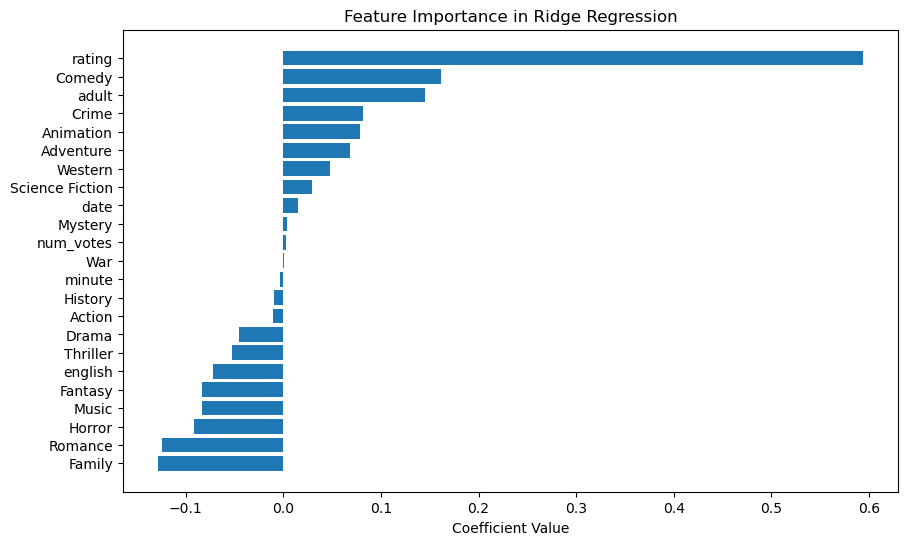

In [21]:
# Retrieve the coefficients
coefficients = best_ridge.coef_
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by value of coefficients
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Ridge Regression')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

This looks about right. Rating should dominate.

### Model Eval

In [22]:
preds = pd.DataFrame(data=y_pred, columns=['pred'])
preds['actual'] = y_test.values
preds['diff'] = preds['pred'] - preds['actual']
preds.head(20)



,pred,actual,diff
0,3.54,4.00,-0.46
1,3.88,5.00,-1.12
2,3.70,3.00,0.70
3,3.72,3.50,0.22
4,3.89,4.50,-0.61
5,3.60,4.00,-0.40
6,3.87,4.00,-0.13
7,3.37,2.00,1.37
8,3.95,3.50,0.45
9,3.64,4.00,-0.36


Text(0.5, 1.0, 'Distribution of error')

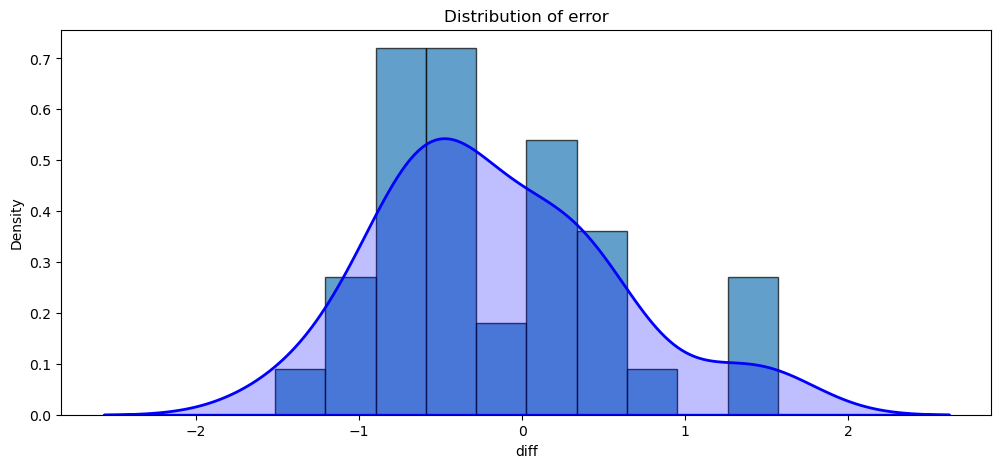

In [23]:
plt.figure(figsize=(12, 5))

plt.hist(preds['diff'], edgecolor='black', density=True, alpha=0.7)
sns.kdeplot(preds['diff'], color='blue', fill=True, linewidth=2)
plt.title('Distribution of error')

Text(0.5, 1.0, 'Distribution of Predictions')

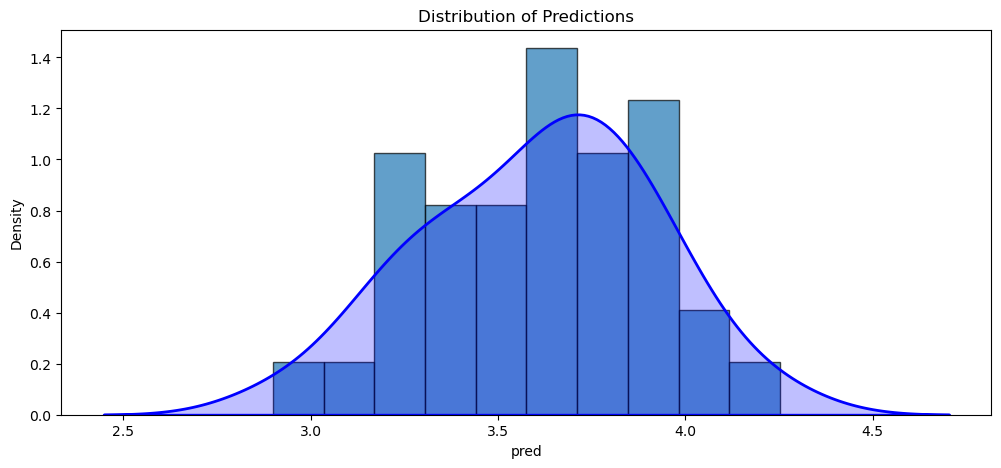

In [24]:
plt.figure(figsize=(12, 5))
plt.hist(preds['pred'], edgecolor='black', density=True, alpha=0.7)
sns.kdeplot(preds['pred'], color='blue', fill=True, linewidth=2)
plt.title("Distribution of Predictions")

## Prediction Test

In [25]:
movies_no_user_feat = movies_no_user.drop(columns=['name', 'description', 'poster', 'tagline'])
movies_no_user_feat = movies_no_user_feat.sort_values(by=['id'], ascending=True)
movies_no_user_feat.head()


,id,date,minute,rating,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,english
2271,1000001.00,2023.00,114.00,3.86,True,5.66,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
15441,1000010.00,1994.00,154.00,4.26,True,165.38,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
17782,1000011.00,2018.00,117.00,4.42,False,123.13,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
19935,1000017.00,2008.00,152.00,4.47,True,179.44,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True
15164,1000020.00,2023.00,142.00,4.05,True,60.35,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True


In [26]:
'''no_user_scaled = scaler.fit_transform(movies_no_user_feat[num_features])

# Creating DataFrames from the scaled numerical features
no_user_scaled = pd.DataFrame(no_user_scaled, columns=num_features)

# Concatenating the scaled numerical features and the one-hot encoded features
no_user_scaled = pd.concat([no_user_scaled.reset_index(drop=True), movies_no_user_feat[one_hot_features].reset_index(drop=True)], axis=1)

no_user_scaled.head()'''


'no_user_scaled = scaler.fit_transform(movies_no_user_feat[num_features])\n\n# Creating DataFrames from the scaled numerical features\nno_user_scaled = pd.DataFrame(no_user_scaled, columns=num_features)\n\n# Concatenating the scaled numerical features and the one-hot encoded features\nno_user_scaled = pd.concat([no_user_scaled.reset_index(drop=True), movies_no_user_feat[one_hot_features].reset_index(drop=True)], axis=1)\n\nno_user_scaled.head()'

In [27]:
ratings = pd.DataFrame(columns=['id', 'userRating'])
ratings['id'] = movies_no_user['id'] 
ratings = ratings.sort_values(by='id')

ratings['userRating'] = best_ridge.predict(movies_no_user_feat.sort_values(by='id').drop(columns='id'))
ratings.head()


,id,userRating
2271,1000001.00,4.00
15441,1000010.00,3.86
17782,1000011.00,4.34
19935,1000017.00,4.19
15164,1000020.00,4.00


In [28]:
movies_no_user = pd.merge(movies_no_user, ratings, how='inner', on=['id'])

In [29]:
movies_no_user = movies_no_user.sort_values(by=['userRating'], ascending=False)
movies_no_user.head()

,id,name,date,tagline,description,minute,rating,poster,adult,num_votes,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,english,userRating
17678,1000011.00,Spider-Man: Into the Spider-Verse,2018.00,More than one wears the mask.,Struggling to find his place in the world whil...,117.00,4.42,https://a.ltrbxd.com/resized/film-poster/2/5/1...,False,123.13,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,4.34
12026,1000072.00,Mad Max: Fury Road,2015.00,What a Lovely Day.,An apocalyptic story set in the furthest reach...,121.00,4.19,https://a.ltrbxd.com/resized/film-poster/6/2/7...,True,148.52,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,4.27
26240,1013814.00,Young Royals Forever,2024.00,NaN,"From casting to the final scene, this special ...",53.00,4.20,https://a.ltrbxd.com/resized/film-poster/1/1/3...,True,2.83,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.25
21077,1000688.00,The Intouchables,2011.00,Sometimes you have to reach into someone else'...,A true story of two men who should never have ...,113.00,4.12,https://a.ltrbxd.com/resized/sm/upload/6d/b1/v...,True,129.95,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.25
20311,1004942.00,The First Slam Dunk,2022.00,NaN,"Shohoku's “speedster” and point guard, Ryota M...",125.00,4.21,https://a.ltrbxd.com/resized/film-poster/7/0/2...,True,17.78,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.23


In [30]:
movies_no_user['diff'] = movies_no_user['userRating'] - movies_no_user['rating']
movies_no_user = movies_no_user.sort_values(by=['diff'], ascending=False)

movies_no_user['diff'].head(10)

12524   1.23
9189    1.21
24659   1.20
6992    1.18
1059    1.15
5902    1.13
4813    1.13
25900   1.12
24143   1.08
20102   1.07
Name: diff, dtype: float64

Text(0.5, 1.0, 'Distribution of diff btwn pred and letterbox')

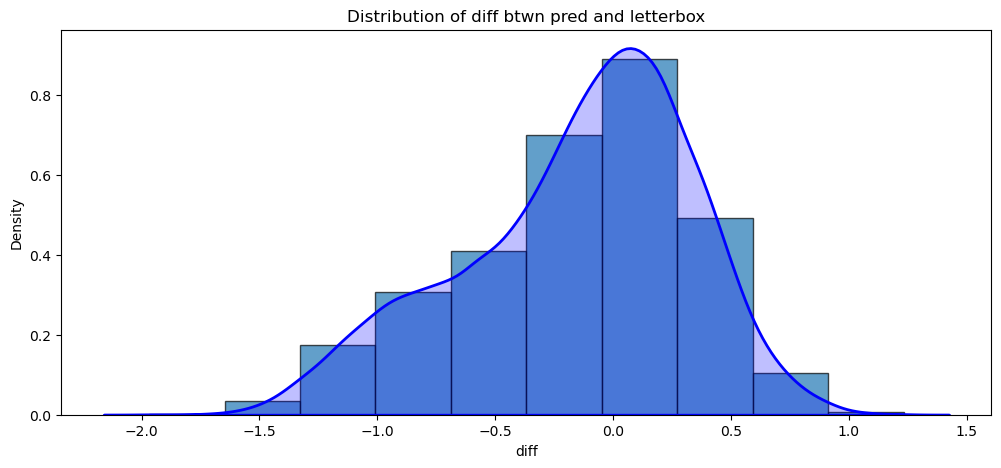

In [31]:
plt.figure(figsize=(12, 5))

plt.hist(movies_no_user['diff'], edgecolor='black', density=True, alpha=0.7)
sns.kdeplot(movies_no_user['diff'], color='blue', fill=True, linewidth=2)
plt.title('Distribution of diff btwn pred and letterbox')